In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Section 1: The Logistic Classification Function

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X, y = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names), pd.DataFrame(data=iris_data.target, columns=["iris_type"])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

,iris_type
0,0
1,0
2,0
3,0
4,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [11]:
logreg = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial", max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = logreg.predict(X_test)

In [14]:
y_pred.shape

(38,)

In [16]:
y_test.shape

(38,)

In [17]:
logreg.predict_proba(X_test)

array([[1.16920655e-04, 5.59257863e-02, 9.43957293e-01],
       [1.26297625e-02, 9.60287011e-01, 2.70832261e-02],
       [9.84395912e-01, 1.56040493e-02, 3.88453035e-08],
       [1.25839194e-06, 2.34470108e-02, 9.76551731e-01],
       [9.70277767e-01, 2.97220685e-02, 1.64558903e-07],
       [2.01085828e-06, 5.98089182e-03, 9.94017097e-01],
       [9.81937415e-01, 1.80625134e-02, 7.13378983e-08],
       [2.83464303e-03, 7.47744753e-01, 2.49420604e-01],
       [1.50626992e-03, 7.39115319e-01, 2.59378412e-01],
       [2.04974204e-02, 9.35758980e-01, 4.37435992e-02],
       [9.19616700e-05, 1.60135607e-01, 8.39772431e-01],
       [6.96100756e-03, 8.10286085e-01, 1.82752907e-01],
       [4.06471630e-03, 7.93847392e-01, 2.02087892e-01],
       [3.04946269e-03, 7.60946429e-01, 2.36004108e-01],
       [3.86022847e-03, 7.10466066e-01, 2.85673706e-01],
       [9.82825548e-01, 1.71743947e-02, 5.72212662e-08],
       [6.70142169e-03, 7.56233140e-01, 2.37065438e-01],
       [1.13768418e-02, 8.44689

In [18]:
logreg.score(X_test, y_test)

0.9736842105263158

Our model definitely did better than the baseline prediction, at 97% instead of 33%

# Section 2: The k-Nearest Neighbors Algorithm

In [20]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

wine_data = load_wine()
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [21]:
X, y = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names), pd.DataFrame(data=wine_data.target, columns=["wine_quality_type"])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
y.head()

,wine_quality_type
0,0
1,0
2,0
3,0
4,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [25]:
X_test.shape

(45, 13)

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 0 2 0 1 1 1]


In [29]:
knn.score(X_test, y_test)

0.7333333333333333

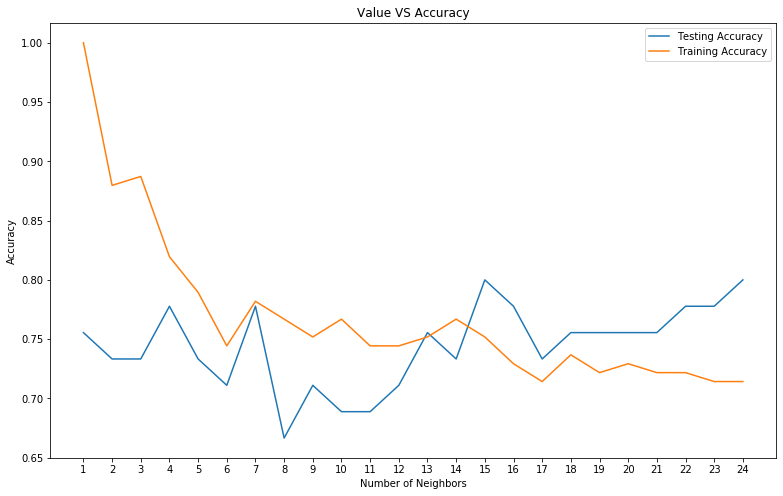

Best Accuracy is 0.8 with K=15


In [30]:
neighbors = np.arange(1, 25)
train_accuracy, test_accuracy = list(), list()

for iterator, kterator in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=kterator)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[13, 8])
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.savefig("knn_accuracies.png")
plt.show()

print("Best Accuracy is {} with K={}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

# Section 3: Support Vector Machine Classifiers

In [32]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
X, y = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names), pd.DataFrame(data=iris_data.target, columns=["iris_type"])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y.head()

,iris_type
0,0
1,0
2,0
3,0
4,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [37]:
svc = SVC(kernel="linear", C=1.0, gamma="auto")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred = svc.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [39]:
y_pred.shape

(38,)

In [40]:
X_test.shape

(38, 4)

In [41]:
svc.score(X_test, y_test)

0.9736842105263158

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

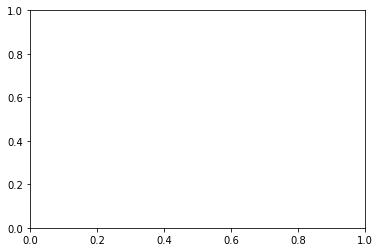

In [42]:
def svc_visualized(iris, kernel="linear", C=1.0, gamma="auto"):
    X, y = iris.data, iris.target

    clf_svc_iris = SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svc_iris.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = (x_max / x_min) / 100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = clf_svc_iris.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn_r)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC (kernel='{}', C={}, gamma={})".format(kernel, C, gamma))

svc_visualized(iris_data)